In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_excel('income.xlsx')
df

,age,education,employment,income
0,41,3,17,176
1,27,1,10,31
2,40,1,15,55
3,41,1,15,120
4,24,2,2,28
...,...,...,...,...
845,34,1,12,32
846,32,2,12,116
847,48,1,13,38
848,35,2,1,24


In [ ]:
#EXPLORE THE DATA

In [9]:
df.shape

(850, 4)

In [10]:
df.describe()
#The number of values in each column.
#The average (mean) of each column.
#The standard deviation of each column.
#The maximum and minimum values for each column.
#The 25th, 50th, and 75th percentiles of the values in each column

,age,education,employment,income
count,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294
std,8.041432,0.927784,6.777884,38.543054
min,20.000000,1.000000,0.000000,13.000000
25%,29.000000,1.000000,3.000000,24.000000
50%,34.000000,1.000000,7.000000,35.000000
75%,41.000000,2.000000,13.000000,55.750000
max,56.000000,5.000000,33.000000,446.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         850 non-null    int64
 1   education   850 non-null    int64
 2   employment  850 non-null    int64
 3   income      850 non-null    int64
dtypes: int64(4)
memory usage: 26.7 KB


In [12]:
df.corr()

,age,education,employment,income
age,1.000000,0.012983,0.554241,0.476218
education,0.012983,1.000000,-0.151117,0.218219
employment,0.554241,-0.151117,1.000000,0.625093
income,0.476218,0.218219,0.625093,1.000000


<Axes: >

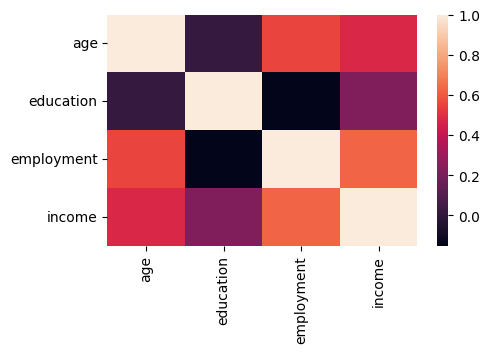

In [18]:
# Calculate correlations
corr =df.corr()
 
# Heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr)

In [13]:
df.columns

Index(['age', 'education', 'employment', 'income'], dtype='object')

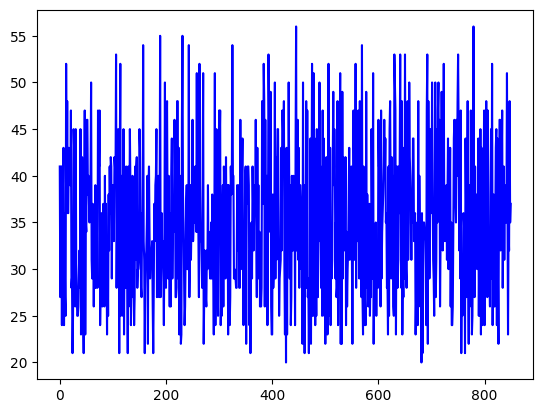

In [14]:
plt.plot(df['age'],color='blue')

<Axes: xlabel='age', ylabel='Count'>

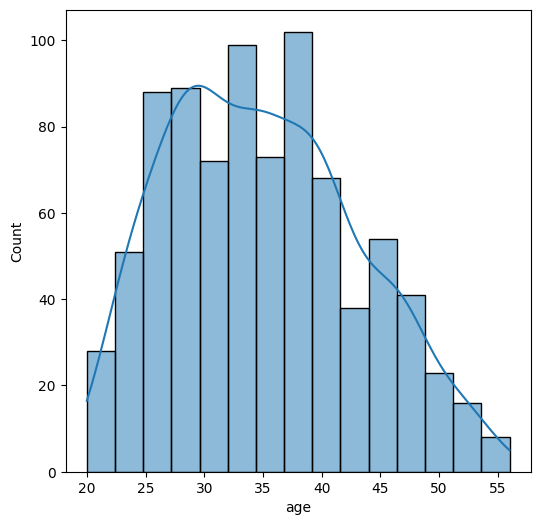

In [15]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(6,6))
sns.histplot(df, x='age',
             kde=True) # Plot the density curve too

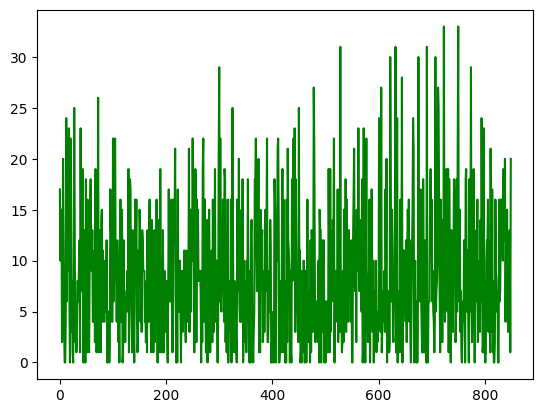

In [21]:
plt.plot(df['employment'],color='green')

<Axes: xlabel='employment', ylabel='Count'>

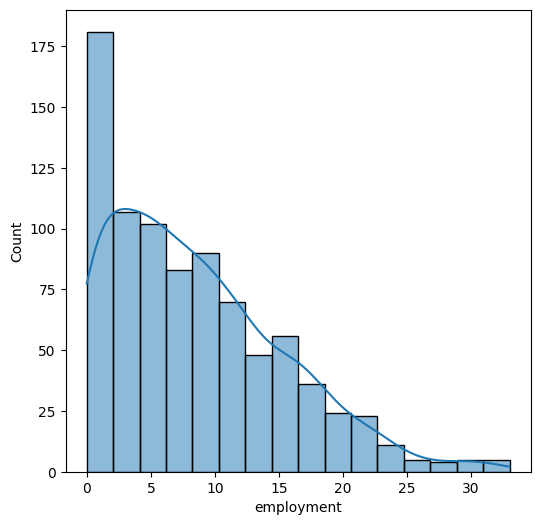

In [20]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(6,6))
sns.histplot(df, x='employment',
             kde=True) # Plot the density curve too

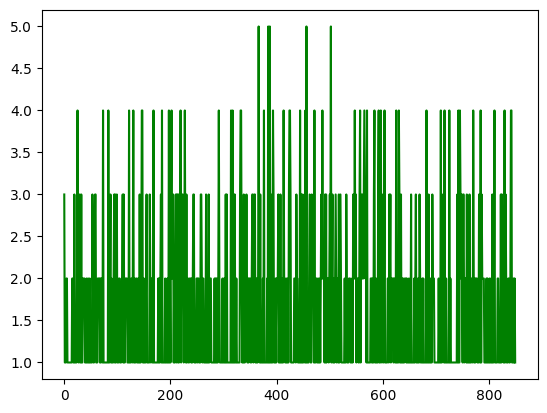

In [22]:
plt.plot(df['education'],color='green')

<Axes: xlabel='education', ylabel='Count'>

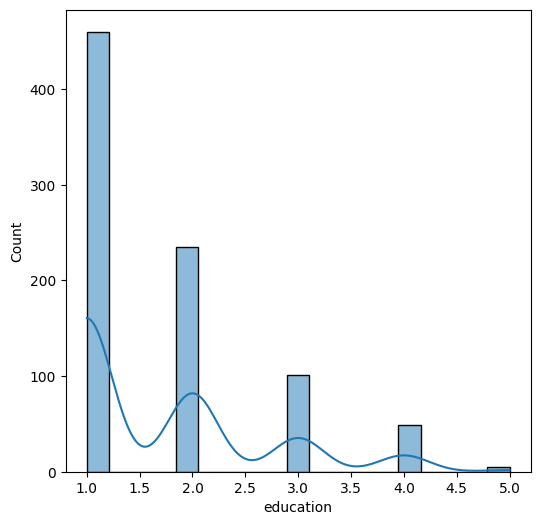

In [23]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(6,6))
sns.histplot(df, x='education',
             kde=True) # Plot the density curve too

## Check for assumption of Regression models

#Linearity 
There must be a linear relationship between the dependent variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.

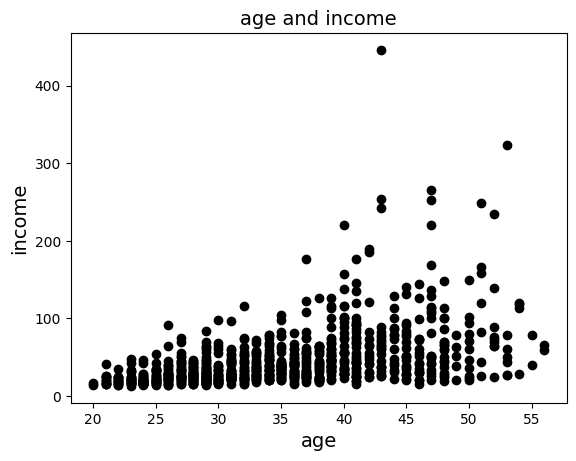

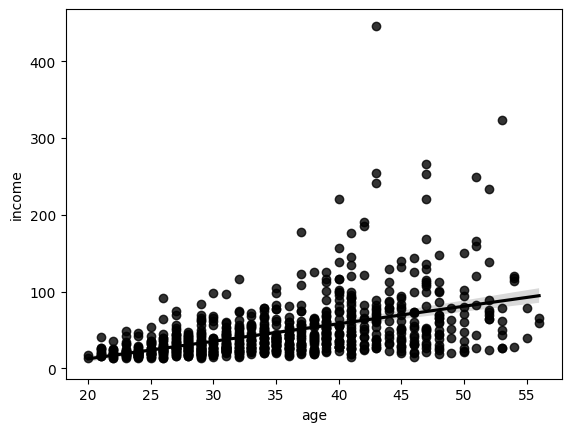

In [43]:
plt.scatter(df['age'], df['income'], color='black')
plt.title('age and income', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('income', fontsize=14)
plt.grid(False)
plt.show()

sns.regplot(data=df, y='income',x='age',color='black')
plt.show()

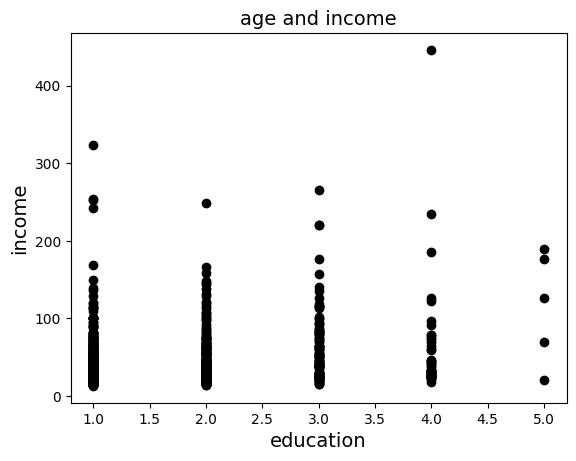

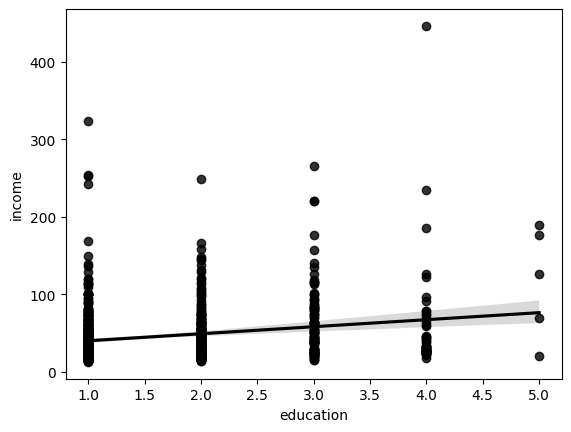

In [41]:
plt.scatter(df['education'], df['income'], color='black')
plt.title('age and income', fontsize=14)
plt.xlabel('education', fontsize=14)
plt.ylabel('income', fontsize=14)
plt.grid(False)
plt.show()


sns.regplot(data=df, x='education',y='income',color='black')
plt.show()

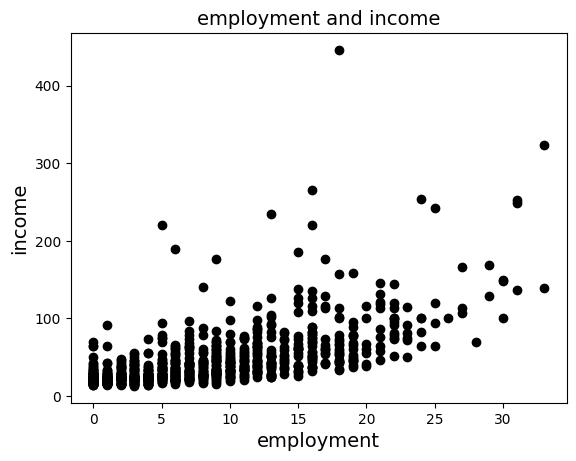

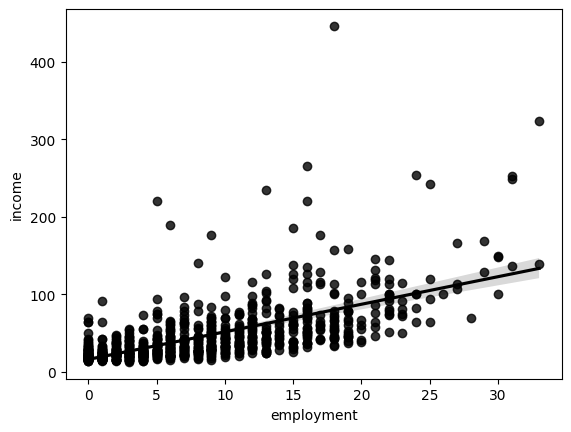

In [45]:
plt.scatter(df['employment'], df['income'], color='black')
plt.title('employment and income', fontsize=14)
plt.xlabel('employment', fontsize=14)
plt.ylabel('income', fontsize=14)
plt.grid(False)
plt.show()

sns.regplot(data=df, x='employment',y='income',color='black')
plt.show()

In [ ]:
#Multicolinearity

No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values or correlation value

In [46]:
#fit multiple regression model
from sklearn import linear_model
import statsmodels.api as sm


x = df[['age', 'employment','education']]
y = df['income']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -28.122619683871264
Coefficients: 
 [ 0.69317703  3.36151362 12.69855561]
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     287.8
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          1.01e-128
Time:                        03:33:15   Log-Likelihood:                -4010.7
No. Observations:                 850   AIC:                             8029.
Df Residuals:                     846   BIC:                             8048.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

eval_env: 1


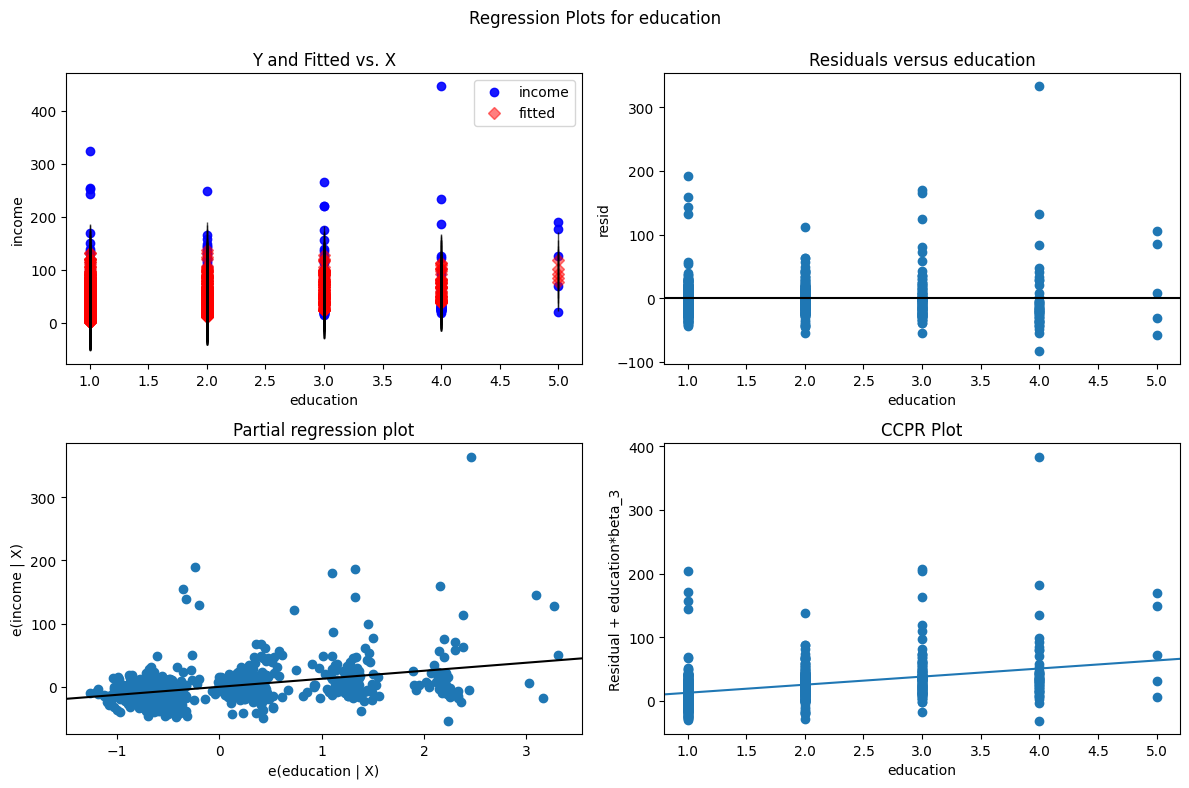

In [48]:
#create residual vs. predictor plot for 'education'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'education', fig=fig)

eval_env: 1


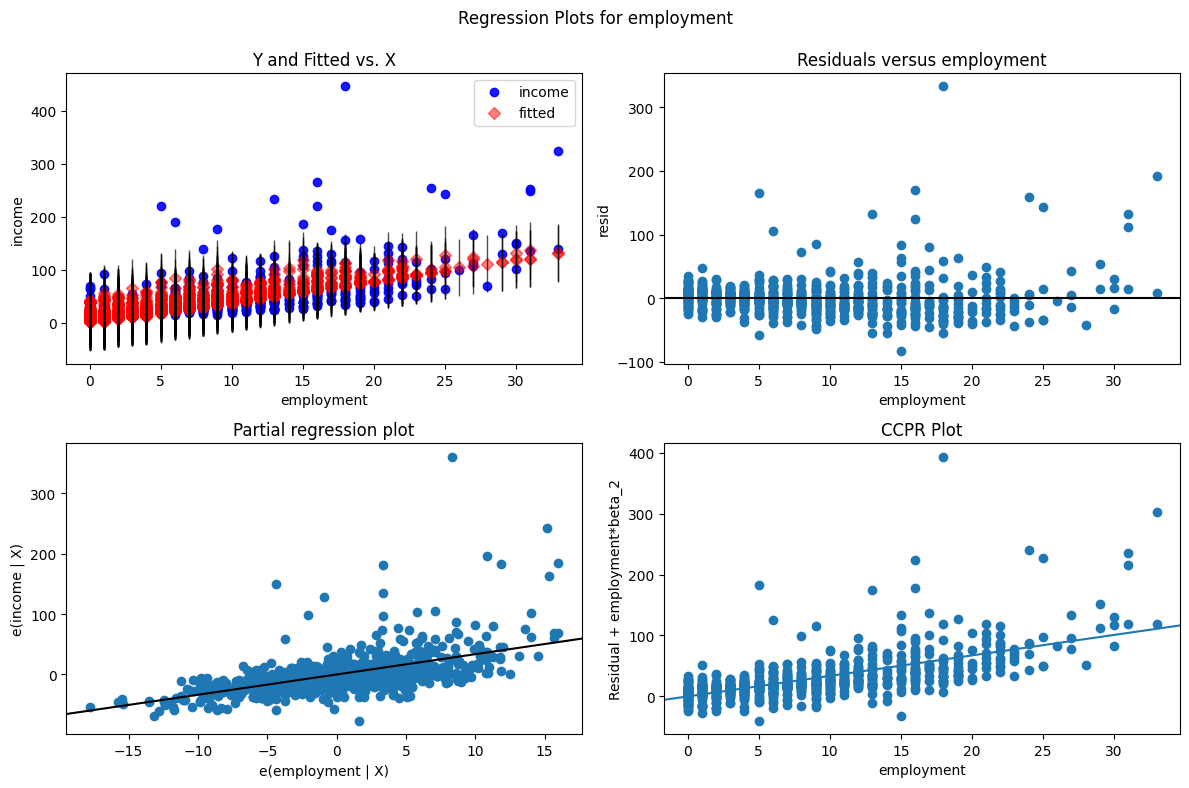

In [49]:
#create residual vs. predictor plot for 'employment'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'employment', fig=fig)

eval_env: 1


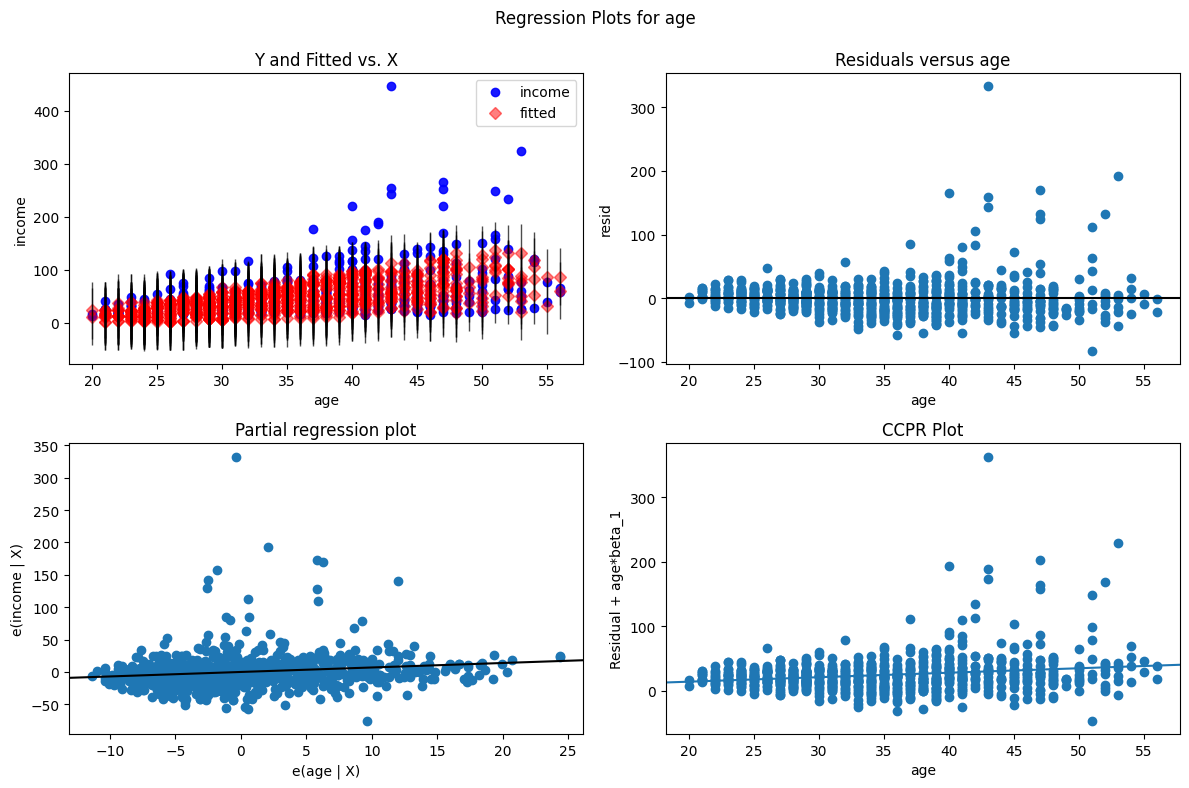

In [50]:
#create residual vs. predictor plot for 'age'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'age', fig=fig)